# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [335]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [336]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [337]:
baseURl = "https://api.openweathermap.org/data/2.5/weather"

weather_data_df = []
i=0
for city in cities:
    i=i+1
    _params = {"q": city, "units": "metric", "appid": weather_api_key}
    print("Processing record for City - ", i, city)
    try:
        weather = requests.get(baseURl, params=_params).json()
        now = datetime.now()
        lat = weather["coord"]["lat"]
        lon = weather["coord"]["lon"]
        country = weather["sys"]["country"]
        max_temp = weather["main"]["temp_max"]
        humidity = weather["main"]["humidity"]
        clouds = weather["clouds"]["all"]
        wind_speed = weather["wind"]["speed"]
        timestamp = int(round(now.timestamp()))

        weather_data_df.append({
            "City": city.title(),
            "Lat": lat,
            "Lng": lon,
            "Max Temp": max_temp,
            "Humidity": humidity,
            "Cloudiness": clouds,
            "Wind Speed": wind_speed,
            "Country": country,
            "Date": str(timestamp)})
        
    except:
        print("City not found. Skipping...")
        pass


Processing record for City -  1 dafeng
Processing record for City -  2 nuuk
Processing record for City -  3 airai
Processing record for City -  4 arraial do cabo
Processing record for City -  5 te anau
Processing record for City -  6 lourdes
Processing record for City -  7 kapustin yar
Processing record for City -  8 carutapera
Processing record for City -  9 amderma
City not found. Skipping...
Processing record for City -  10 puerto ayora
Processing record for City -  11 vaini
Processing record for City -  12 hofn
Processing record for City -  13 karasjok
Processing record for City -  14 rikitea
Processing record for City -  15 bredasdorp
Processing record for City -  16 aklavik
Processing record for City -  17 ilulissat
Processing record for City -  18 kodiak
Processing record for City -  19 kruisfontein
Processing record for City -  20 atar
Processing record for City -  21 abu samrah
Processing record for City -  22 eravur
Processing record for City -  23 kapaa
Processing record for

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [338]:
cities_weather_data_df = pd.DataFrame(weather_data_df)
cities_weather_data_df.index.name='City_ID'
cities_weather_data_df.to_csv(output_data_file)
cities_weather_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Dafeng,23.4517,108.5881,29.05,69,54,0.95,CN,1663501710
1,Nuuk,64.1835,-51.7216,10.34,66,40,2.57,GL,1663501711
2,Airai,-8.9266,125.4092,16.52,71,90,0.78,TL,1663501712
3,Arraial Do Cabo,-22.9661,-42.0278,18.92,82,40,3.60,BR,1663501714
4,Te Anau,-45.4167,167.7167,5.22,93,100,1.16,NZ,1663501715


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [339]:
#  Get the indices of cities that have humidity over 100%.


In [340]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

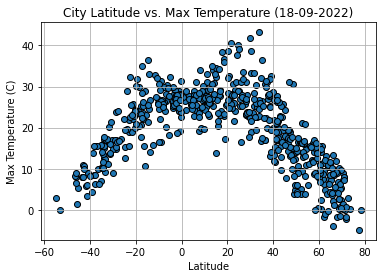

In [341]:
now = datetime.now()
date = now.strftime("%d-%m-%Y")

x = cities_weather_data_df['Lat']
y = cities_weather_data_df['Max Temp']

plt.scatter(x, y, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Max Temperature (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig( "output_data/" + plt.gca().get_title() +'.png', facecolor='w')

## Latitude vs. Humidity Plot

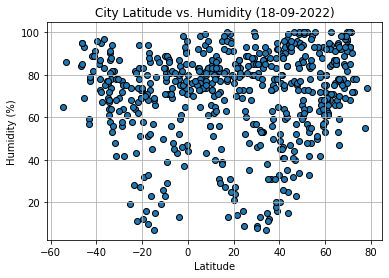

In [342]:
y = cities_weather_data_df['Humidity']

plt.scatter(x, y, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Humidity (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig( "output_data/" + plt.gca().get_title() +'.png', facecolor='w')

## Latitude vs. Cloudiness Plot

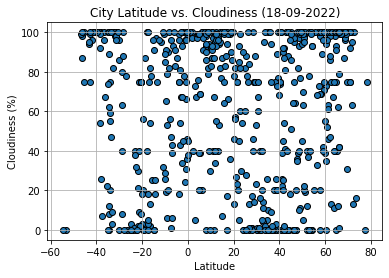

In [343]:
y = cities_weather_data_df['Cloudiness']

plt.scatter(x, y, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Cloudiness (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig( "output_data/" + plt.gca().get_title() +'.png', facecolor='w')

## Latitude vs. Wind Speed Plot

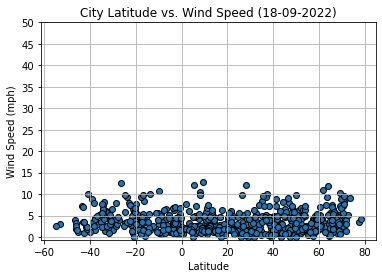

In [344]:

y = cities_weather_data_df['Wind Speed']

plt.scatter(x, y, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Wind Speed (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.yticks(np.arange(0, 55, 5))
plt.savefig( "output_data/" + plt.gca().get_title() +'.png', facecolor='w')

## Linear Regression

In [345]:
north = cities_weather_data_df.loc[cities_weather_data_df['Lat'] >= 0]
south = cities_weather_data_df.loc[cities_weather_data_df['Lat'] < 0]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.811


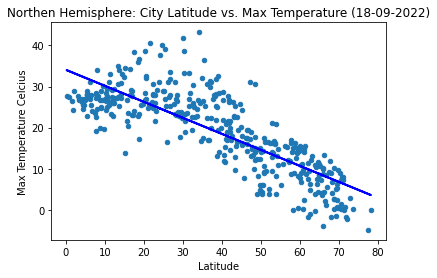

In [346]:
linear_regression = linregress(north['Lat'], north['Max Temp'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)

plt.plot(north['Lat'],linear_equation,linewidth = 2,color = 'blue')

plt.title('Northen Hemisphere: City Latitude vs. Max Temperature (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.817


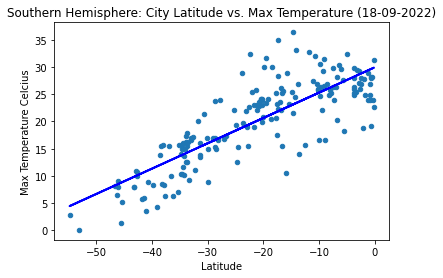

In [347]:
linear_regression = linregress(south['Lat'], south['Max Temp'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(x = 'Lat',y = 'Max Temp',)
    

plt.plot(south['Lat'],linear_equation,linewidth = 2,color = 'blue')

plt.title('Southern Hemisphere: City Latitude vs. Max Temperature (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.092


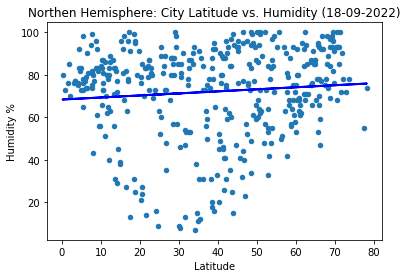

In [348]:
linear_regression = linregress(north['Lat'], north['Humidity'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(x = 'Lat',y = 'Humidity',)

plt.plot(north['Lat'],linear_equation,linewidth = 2,color = 'blue')

plt.title('Northen Hemisphere: City Latitude vs. Humidity (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.178


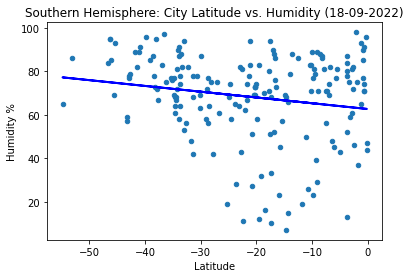

In [349]:
linear_regression = linregress(south['Lat'], south['Humidity'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter( x = 'Lat', y = 'Humidity',)

plt.plot(south['Lat'],linear_equation,linewidth = 2,color = 'blue')

plt.title('Southern Hemisphere: City Latitude vs. Humidity (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.021


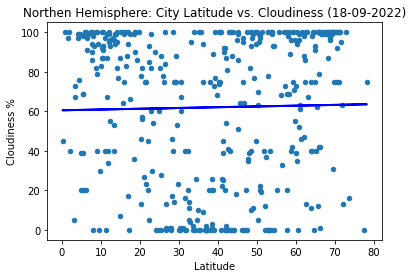

In [350]:
linear_regression = linregress(north['Lat'], north['Cloudiness'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(x = 'Lat',y = 'Cloudiness',)

plt.plot(north['Lat'],linear_equation,linewidth = 2,color = 'blue')

plt.title('Northen Hemisphere: City Latitude vs. Cloudiness (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.064


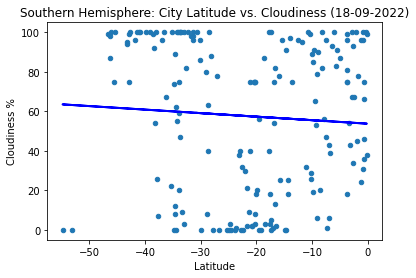

In [351]:
linear_regression = linregress(south['Lat'], south['Cloudiness'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(x = 'Lat',y = 'Cloudiness',)

plt.plot(south['Lat'],linear_equation,linewidth = 2,color = 'blue')

plt.title('Southern Hemisphere: City Latitude vs. Cloudiness (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.152


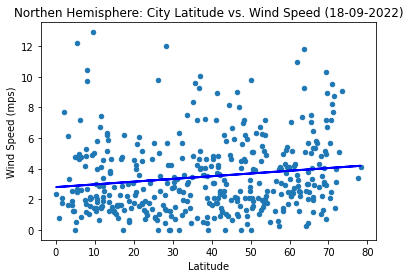

In [352]:
linear_regression = linregress(north['Lat'], north['Wind Speed'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(x = 'Lat',y = 'Wind Speed',)
plt.plot(north['Lat'],linear_equation,linewidth = 2,color = 'blue')
plt.title('Northen Hemisphere: City Latitude vs. Wind Speed (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.139


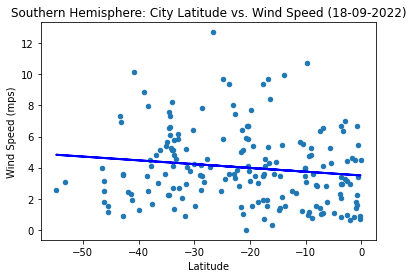

In [353]:
linear_regression = linregress(south['Lat'], south['Wind Speed'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter( x = 'Lat', y = 'Wind Speed',)
plt.plot( south['Lat'], linear_equation,linewidth = 2,color = 'blue')
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()